# Facebook Performance Matrices

## Table of Contents
* 1  Data Preprocessing

* 2  Exploratory Data Analysis (EDA)

* 2.1  Correlation Matrix

* 2.2  Total Page Likes

* 2.3  Category

* 2.4  Post Month

* 2.5  Post Weekday

* 2.6  Post Hour

* 2.7  Paid

* 2.8  Comments

* 2.9  Likes

* 2.10  Shares

* 2.11  Lifetime Data Analysis

* 3  Machine Learning

   * 3.1  SVM Feature Importance

   * 3.2  Linear Regression

   * 3.3  Random Forest

### Import the necessary libraries

In [8]:
!pip install keras

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("dataset_Facebook.csv",";")
df.head()

C:\Users\Hp\anaconda3\Anacondanew\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Basic Checks

In [3]:
df.head(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
df.tail()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


In [5]:
df.shape

(500, 19)

In [6]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

### Data Cleaning


In [8]:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [9]:
df['Paid'].fillna(value=df['Paid'].median(),inplace=True)
df['Paid'].isnull().sum()

0

In [10]:
df['comment'].fillna(value=df['comment'].median(),inplace=True)
df['comment'].isnull().sum()

0

In [11]:
df['share'].fillna(value=df['share'].median(),inplace=True)
df['share'].isnull().sum()

0

In [12]:
df['like'].fillna(value=df['like'].median(),inplace=True)
df['like'].isnull().sum()

0

In [13]:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

### EDA

<AxesSubplot:>

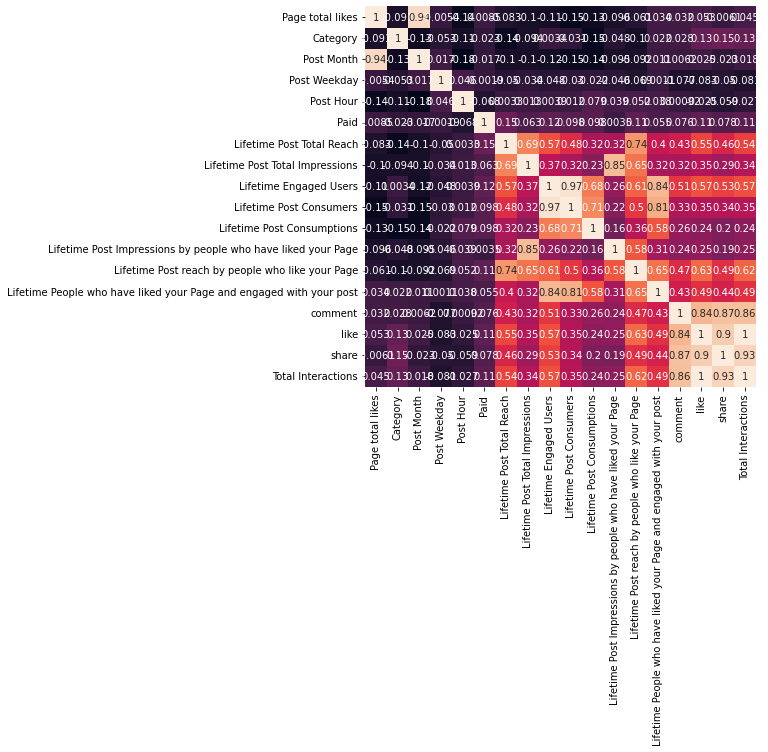

In [14]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cbar=False)

### Total Page Likes

In [15]:
df['Page total likes'].describe()

count       500.000000
mean     123194.176000
std       16272.813214
min       81370.000000
25%      112676.000000
50%      129600.000000
75%      136393.000000
max      139441.000000
Name: Page total likes, dtype: float64

In [16]:
df.iloc[:,0].unique()

array([139441, 138414, 138458, 138895, 138353, 138329, 138185, 137893,
       137177, 137059, 137020, 136736, 136642, 136393, 136013, 135713,
       135700, 135617, 135428, 135195, 134879, 133679, 133594, 133451,
       132817, 132201, 131956, 131808, 131728, 131630, 131300, 130791,
       129600, 128032, 127082, 126424, 126345, 126141, 125612, 124940,
       123047, 121540, 120050, 119198, 117764, 116435, 116091, 115893,
       115368, 113028, 111620, 109670, 107907, 106928, 104070, 102112,
       100732,  98195,  96749,  93684,  93577,  93470,  93363,  93256,
        93149,  93042,  92935,  92828,  92721,  92614,  92507,  92400,
        92293,  92186,  92079,  91972,  91865,  91758,  91651,  91544,
        91437,  91330,  91223,  91116,  91009,  86909,  86491,  85979,
        85093,  81370], dtype=int64)

Text(0.5, 1.0, 'Total pages likes')

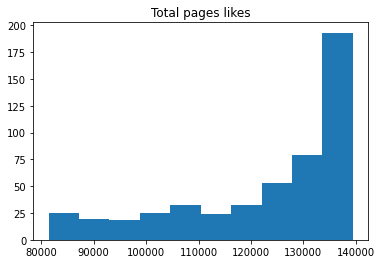

In [17]:
plt.hist(df.iloc[:,0])
plt.title("Total pages likes")

### Category

In [18]:
df.iloc[:,1].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

Text(0.5, 1.0, 'Different types of post compared')

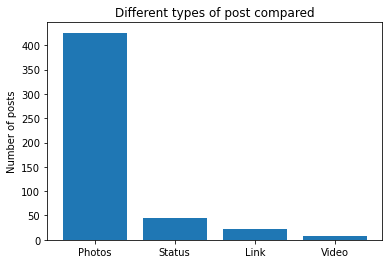

In [19]:
objects = ('Photos', 'Status', 'Link', 'Video')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.iloc[:,1].value_counts().values)
plt.xticks(y_pos, objects)
plt.ylabel('Number of posts')
plt.title('Different types of post compared')

Text(0, 0.5, 'Number of posts')

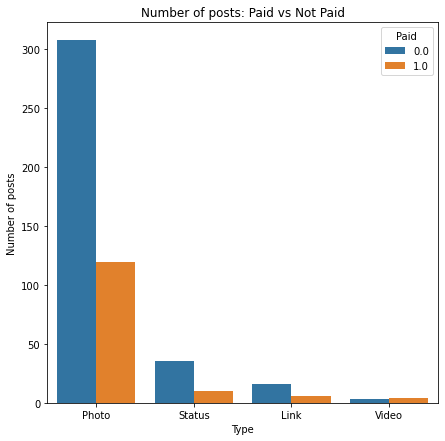

In [20]:
plt.figure(figsize=(7,7))

sns.countplot(x='Type',hue='Paid',data=df)
plt.title("Number of posts: Paid vs Not Paid")
plt.ylabel("Number of posts")

### Post Month

Text(0.5, 1.0, 'Number of posts for each month')

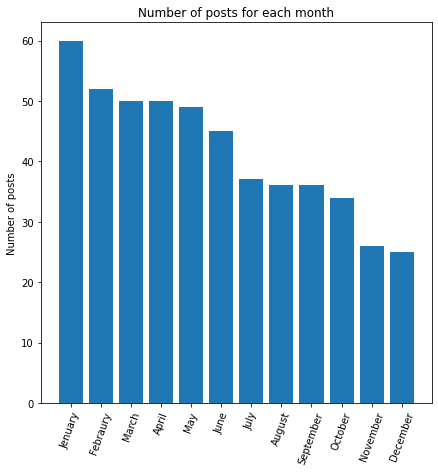

In [21]:
plt.figure(figsize=(7,7))

objects = ('Jenuary', 'Febraury', 'March', 'April','May','June','July','August','September','October','November','December')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.iloc[:,3].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each month')


### Post Weekdays

Text(0.5, 1.0, 'Number of posts for each week-day')

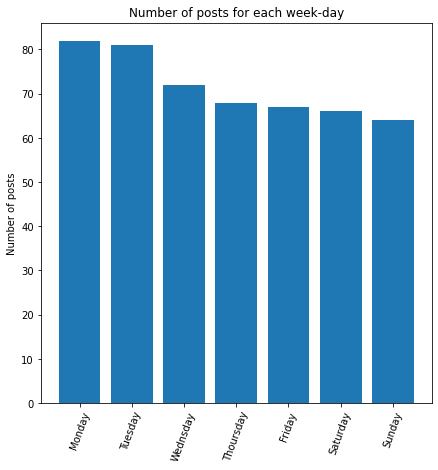

In [22]:
plt.figure(figsize=(7,7))

objects = ('Monday', 'Tuesday', 'Wednsday', 'Thoursday','Friday','Saturday','Sunday')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.iloc[:,4].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each week-day')

### Post Hour

In [23]:
np.unique(df.iloc[:,5])
print(len(df.iloc[:,5].value_counts().values))
a = df.iloc[:,5].value_counts().values
a = np.insert(a, 20, 0)
a = np.insert(a, 0, 0)
np.arange(24)
# At mindight and 9pm, no messagess were sent, therefore I added 2 zeroes at these locations in the dataset column.

22


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

Text(0.5, 1.0, 'Number of posts for each hour of the day')

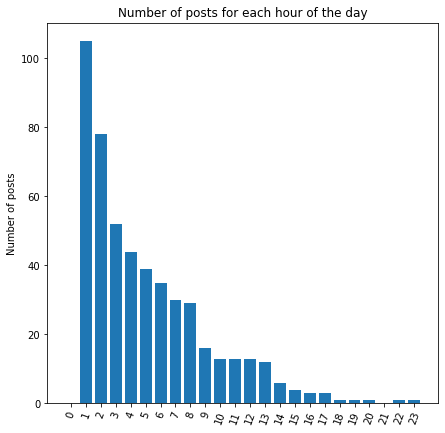

In [24]:
plt.figure(figsize=(7,7))

objects = (np.arange(24))
y_pos = np.arange(len(objects))
# print(len(y_pos))
# print(len(a))
plt.bar(y_pos, a)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each hour of the day')

### Paid

Text(0.5, 1.0, 'Number of posts: Free vs Paid')

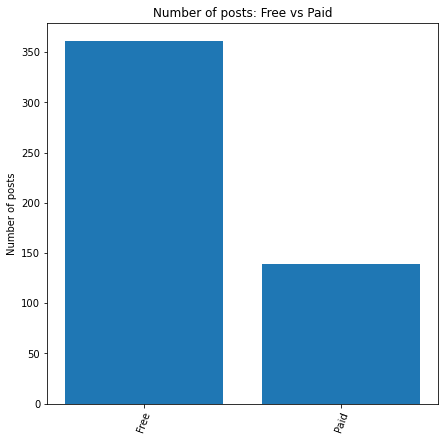

In [25]:
plt.figure(figsize=(7,7))

objects = ('Free', 'Paid')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.iloc[:,6].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts: Free vs Paid')

Text(0.5, 1.0, 'Number of posts: Free vs Paid')

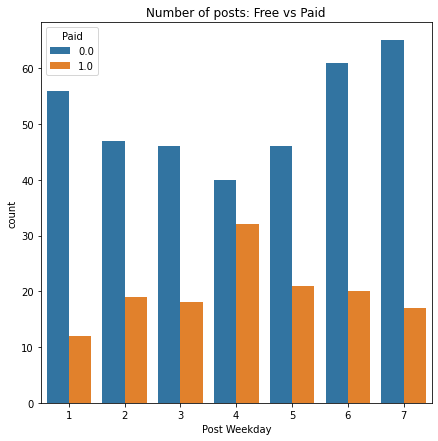

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(x='Post Weekday',hue='Paid',data=df)
plt.title("Number of posts: Free vs Paid")

### Comments

Text(0.5, 1.0, 'Comments per post distribution')

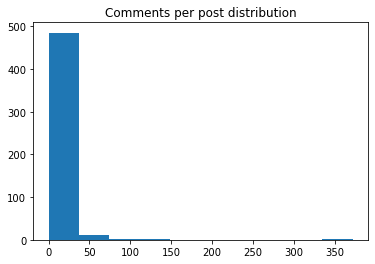

In [27]:
plt.hist(df.iloc[:,len(df.columns)-4])
plt.title("Comments per post distribution")

### Likes

Text(0.5, 1.0, 'Likes per post distribution')

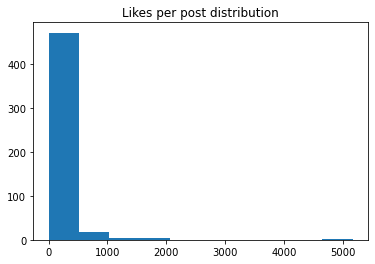

In [28]:
plt.hist(df.iloc[:,len(df.columns)-3])
plt.title("Likes per post distribution")

### Shares

Text(0.5, 1.0, 'Share per post distribution')

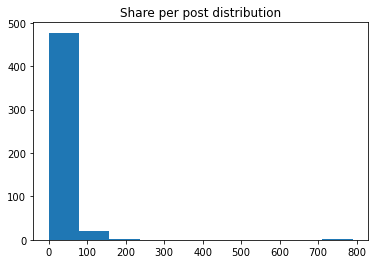

In [29]:
plt.hist(df.iloc[:,len(df.columns)-2])
plt.title("Share per post distribution")

### Lifetime data analysis

<Figure size 504x504 with 0 Axes>

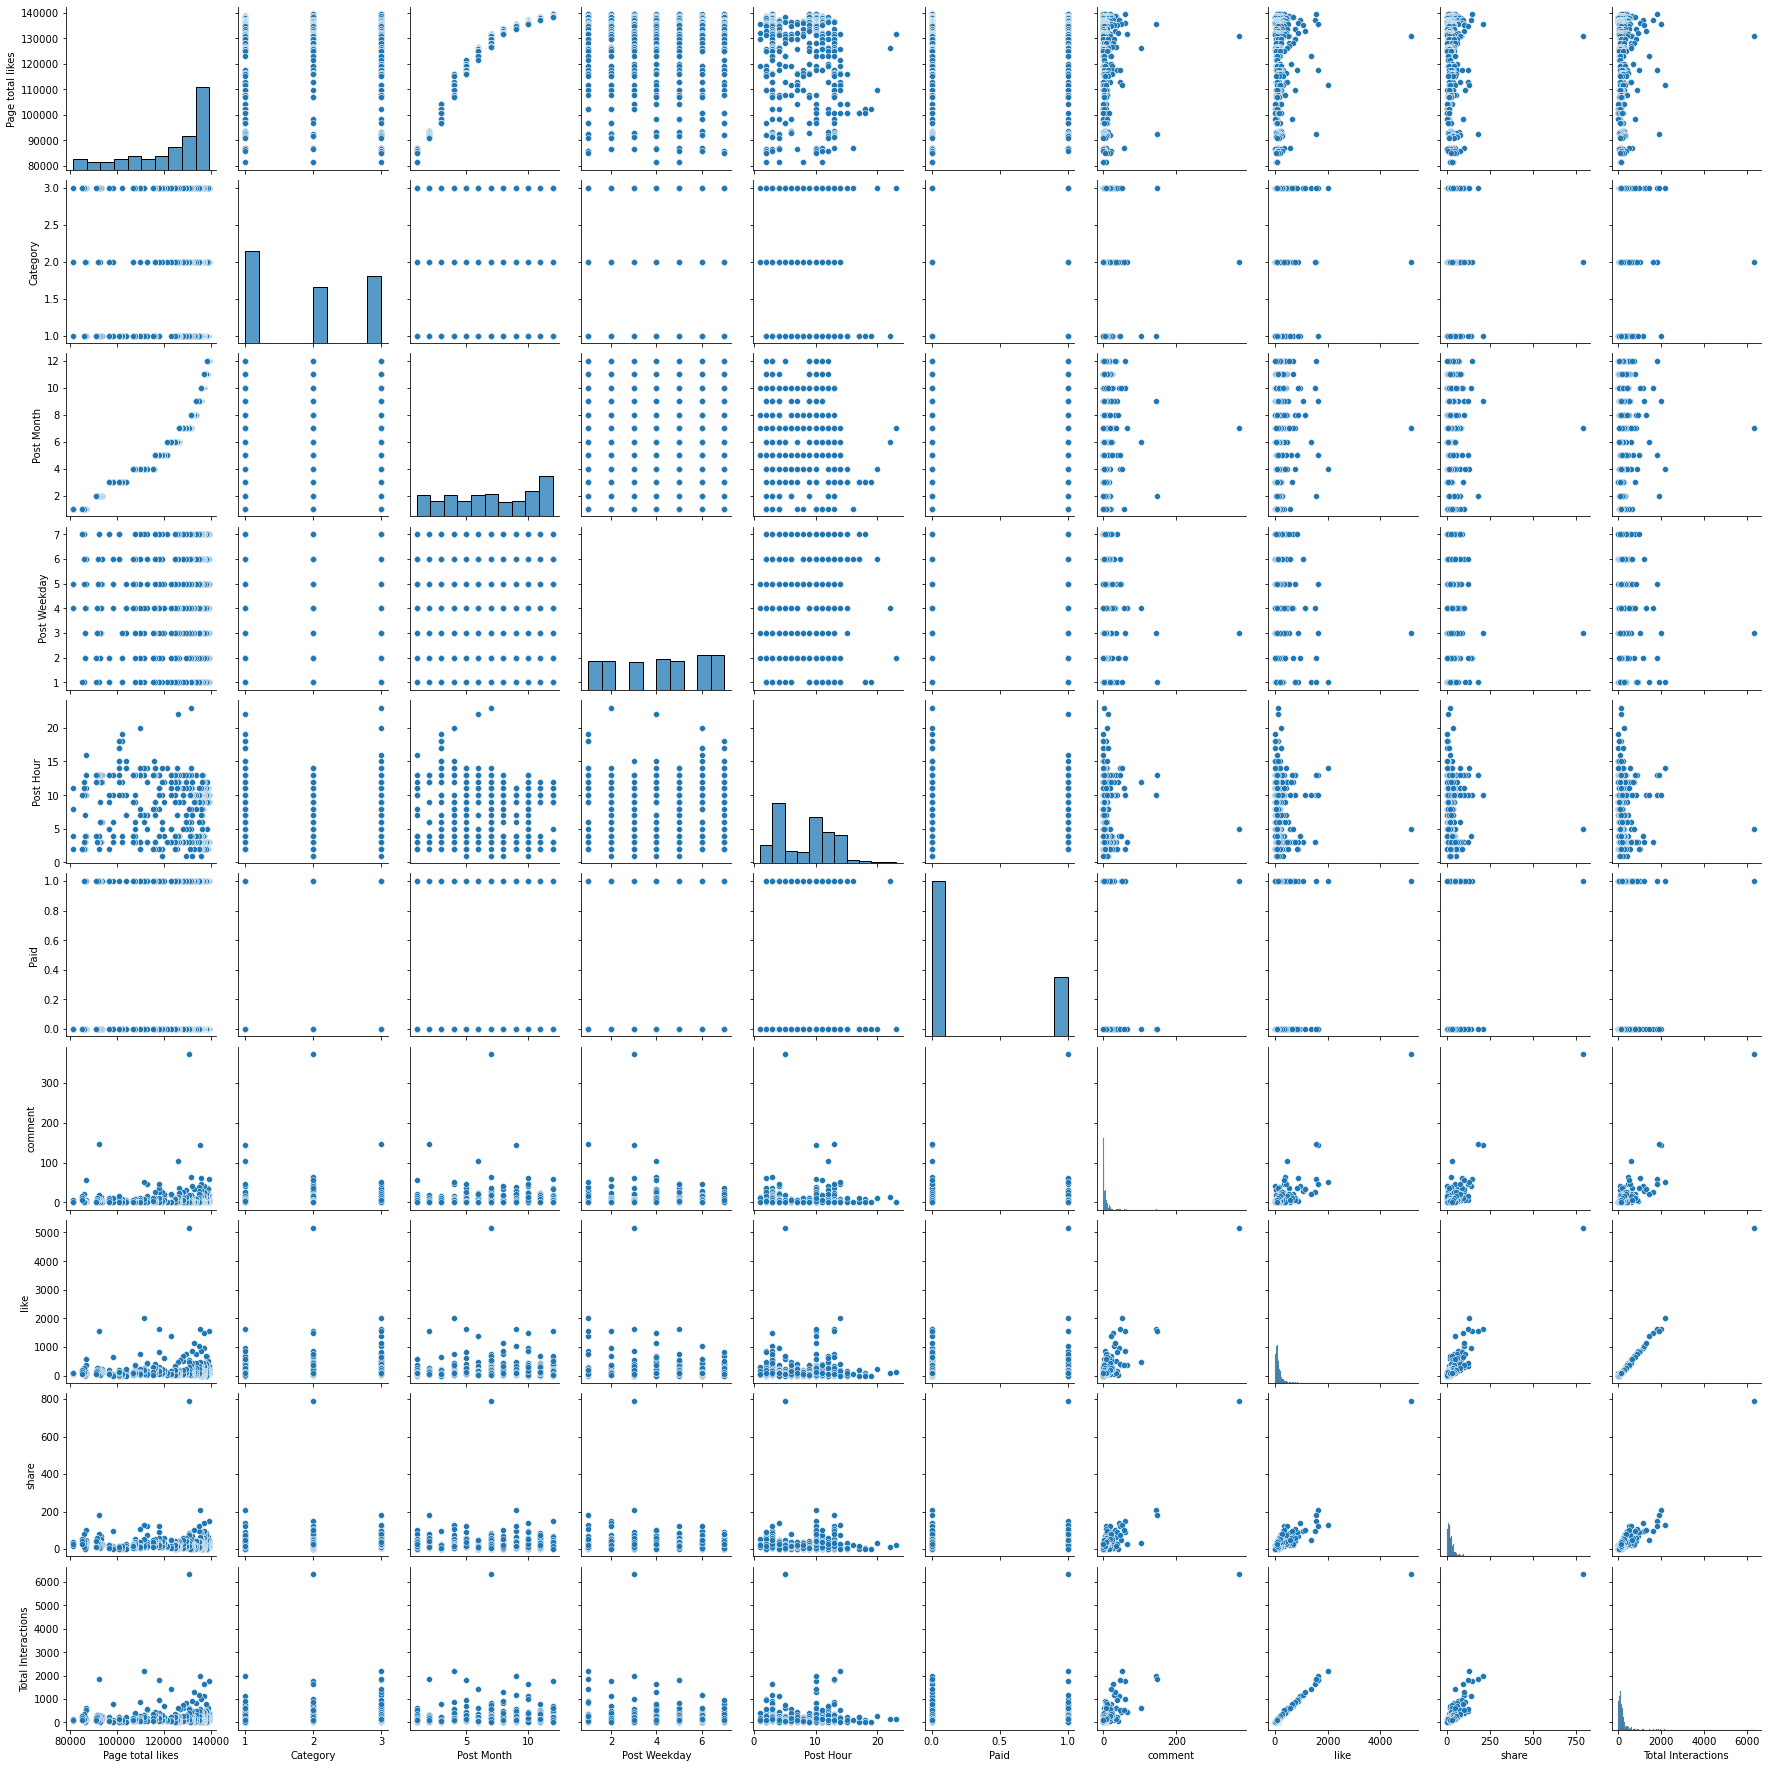

<Figure size 504x504 with 0 Axes>

In [30]:
dfplot = df.drop(df.columns[7:15],axis =1)
sns.pairplot(data=dfplot)
plt.figure(figsize=(7,7))

### Convert categorical into numerical 

In [31]:
lb_make = LabelEncoder()
df["Type"] = lb_make.fit_transform(df["Type"])
df = df.fillna(0)
df.head(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


### Model Creation

In [32]:
X = df.drop(['like'], axis = 1).values
Y = df['like'].values

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

### SVM Feature importance

['Page total likes' 'Type' 'Category' 'Post Month' 'Post Weekday'
 'Post Hour' 'Paid' 'Lifetime Post Total Reach'
 'Lifetime Post Total Impressions' 'Lifetime Engaged Users'
 'Lifetime Post Consumers' 'Lifetime Post Consumptions'
 'Lifetime Post Impressions by people who have liked your Page'
 'Lifetime Post reach by people who like your Page'
 'Lifetime People who have liked your Page and engaged with your post'
 'comment' 'share' 'Total Interactions']


C:\Users\Hp\anaconda3\Anacondanew\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


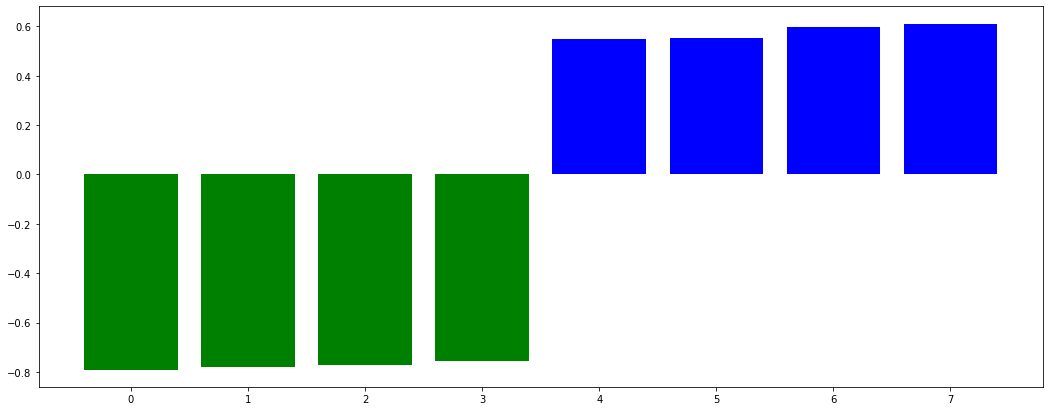

In [33]:
from sklearn import svm
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=4):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(18, 7))
    colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    #plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
    plt.show()

print(df.drop(['like'], axis = 1).columns.values)

trainedsvm = svm.LinearSVC().fit(X, Y)
feature_plot(trainedsvm, df.drop(['like'], axis = 1).columns.values)

## Linear Regression

In [34]:
reg = LinearRegression().fit(X_Train,Y_Train)
reg.score(X_Train,Y_Train)

0.9996544635817648